## Latihan Membuat Model Klasifikasi Gambar
## Messy vs Clean Room

In [1]:
#memastikan bahwa versi tensorflow sudah versi 2 ke atas
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
#mengunduh dataset
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2022-08-28 15:22:49--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   176MB/s    in 0.4s    

2022-08-28 15:22:49 (176 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [4]:
#melakukan ekstraksi pada file zip
import zipfile, os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
#melihat direktori data latih
os.listdir('/tmp/images/train')

['messy', 'clean']

In [6]:
#melihat direktori data validasi
os.listdir('/tmp/images/val')

['messy', 'clean']

In [9]:
#menerapkan ImageDataGenerator untuk data latih dan data validasi
#proses augmentasi gambar pada setiap sampel di dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [10]:
#siapkan data latih dan validasi dari kumpulan data gambar yang di-load dalam memori melalui fungsi flow()
train_generator = train_datagen.flow_from_directory(
          train_dir, #direktori data latih
          target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
          batch_size=4,
          # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
          class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
          validation_dir, # direktori data validasi
          target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
          batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
          class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [11]:
#membangun model Convolutional Neural Network (CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
#melihat summary dari arsitektur model yang telah kita buat
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
print(train_generator.class_indices)

{'clean': 0, 'messy': 1}


In [17]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=10,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
10/10 - 5s - loss: 0.5009 - accuracy: 0.7250 - val_loss: 0.6086 - val_accuracy: 0.7000 - 5s/epoch - 548ms/step
Epoch 2/20
10/10 - 8s - loss: 0.5162 - accuracy: 0.8250 - val_loss: 0.5315 - val_accuracy: 0.7500 - 8s/epoch - 809ms/step
Epoch 3/20
10/10 - 9s - loss: 0.4210 - accuracy: 0.8250 - val_loss: 0.4732 - val_accuracy: 0.7500 - 9s/epoch - 866ms/step
Epoch 4/20
10/10 - 5s - loss: 0.5245 - accuracy: 0.7000 - val_loss: 0.4807 - val_accuracy: 0.7500 - 5s/epoch - 507ms/step
Epoch 5/20
10/10 - 5s - loss: 0.4284 - accuracy: 0.8250 - val_loss: 0.5057 - val_accuracy: 0.7000 - 5s/epoch - 516ms/step
Epoch 6/20
10/10 - 5s - loss: 0.4792 - accuracy: 0.8250 - val_loss: 0.5236 - val_accuracy: 0.7500 - 5s/epoch - 505ms/step
Epoch 7/20
10/10 - 6s - loss: 0.4855 - accuracy: 0.7000 - val_loss: 0.5283 - val_accuracy: 0.7000 - 6s/epoch - 558ms/step
Epoch 8/20
10/10 - 5s - loss: 0.5586 - accuracy: 0.7000 - val_loss: 0.4870 - val_accuracy: 0.8000 - 5s/epoch - 495ms/step
Epoch 9/20
10/10 - 5s - 

In [18]:
model.evaluate(train_generator)

48/48 [==============================] - 5s 108ms/step - loss: 0.4209 - accuracy: 0.8229


[0.4208957850933075, 0.8229166865348816]

Saving download3.jpg to download3.jpg
download3.jpg
clean


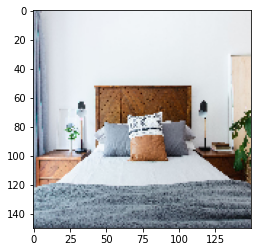

In [21]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')

Model ini memiliki nilai akurasi yang belum tinggi dan dataset sedikit jumlahnya, jadi prediksi masih kurang akurat.